In [203]:
%matplotlib inline

from ast import literal_eval
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.8f}'.format

# საწყისი ცხრილი

ცხრილის მონაცემები, სადაც კორპუსიდან ამოღბულია სიტყვის ყველა შესაძლო მახასიათებელი. მათ შორის ლემების და მეტყველების ნაწილაკებიხ რამოდენიმე ვარიანტი

In [2]:
df = pd.read_csv('csv/adv_dict.csv')
df[:100]

,word_init,word_mod,lemma_basic,lemma_adv,pos_tag,freq
0,ამ,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}","{'Pron', 'Dem', 'Gen', 'Erg', 'Prop', 'Inst', ...",1041654
1,ზამთრის,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}","{'Gen', 'Sg', 'LevGuess', 'Temp', 'N'}",8035
2,მიწურულს,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...","{'Pv', 'Sg', 'A', 'PastPart', 'LevGuess', 'Dat...",5976
3,თითქმის,თითქმის,{'თითქმის'},{'თითქმის'},"{'LevGuess', 'Adv', 'DegNum', 'Deg'}",62608
4,სასოწარკვეთილი,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}","{'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...",844
...,...,...,...,...,...,...
95,ხომ,ხომ,{'ხომ'},{'ხომ'},"{'Disc', 'Adv'}",127578
96,ვსაყვედურობდი,ვსაყვედურობდი,"{'საყვედურ·ი', 'საყვედური'}","{'საყვედურ-ი/საყვედურ', 'საყვედურ·ი/საყვედურ'}","{'<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S-IO>', ...",19
97,საწინააღმდეგო,საწინააღმდეგო,{'საწინააღმდეგო'},{'საწინააღმდეგო'},"{'Gen', 'Erg', 'Att', 'A', 'Nom', 'Inst', 'Sg'...",9474
98,გაქვს,გაქვს,{'ქონა'},{'ქონ[ა]/ქვ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', 'S...",8972


In [3]:
print(f'number of words: {df.shape[0]}')

number of words: 2635260


## ცხრილის გასუფთავება

### სიტყვები

In [4]:
df['diff'] = np.where(df['word_init'] != df['word_mod'], 1, 0)
diff = df[df['diff'] == 1]
print(f'number of words with different "word_init" and "word_mod" forms: {diff.shape[0]}')
diff[:100]

number of words with different "word_init" and "word_mod" forms: 39066


,word_init,word_mod,lemma_basic,lemma_adv,pos_tag,freq,diff
163,ფანტავდა~,ფანტავდა,{'*·ფანტვა'},{'*·ფანტვ[ა]/ფანტ'},"{'<S:Nom>', 'DO:3', 'S:3Sg', 'V', '<DO:Dat>', ...",50,1
177,სტაბეკს,სტაშეკს,{'სტაშეკ'},{'სტაშეკ'},"{'Prop', 'Anthr', 'Dialect', 'LevGuess', 'Firs...",8,1
219,დამკვიდრა,დამკვიდრდა,"{'დამკვიდრება', 'და·მკვიდრება'}","{'და·მკვიდრებ[ა]/მკვიდრ', 'და-მკვიდრებ[ა]/მკვი...","{'Pv', '<S:Nom>', 'S:3Sg', 'V', '<S>', 'LevGue...",2083,1
333,დავბოდიალობდი,დავბორიალობდი,{'და·ბორიალ·ი'},{'და·ბორიალ·ი/ბორიალ'},"{'Pv', '<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S>...",22,1
428,მქონებოდა,მგონებოდა,{'გონება'},{'გონებ[ა]/გონ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', '<...",19,1
...,...,...,...,...,...,...,...
6535,გავვოცდი,გავოცდი,{'გა·ოცება'},{'გა·ოცებ[ა]/ოც'},"{'Pv', '<S:Nom>', 'S:1Sg', 'V', '<S>', 'LevGue...",288,1
6541,ახვრებს,ახარებს,"{'ხარება', '*·ხარება', 'გა·ხარება'}","{'გა·ხარებ[ა]/ხარ', '*·ხარება', '*·ხარებ[ა]/ხარ'}","{'<S:Nom>', 'DO:3', 'S:3Sg', 'V', '<S-DO-IO>',...",591,1
6742,მხირულება,მხიარულება,{'მხიარულება'},{'მხიარულებ[ა]'},"{'Sg', 'Nom', 'Voc', 'LevGuess', 'N'}",448,1
6854,ფონოკაბინეტს,ფოტოკაბინეტს,{'ფოტოკაბინეტ·ი'},{'ფოტოკაბინეტ·ი'},"{'LevGuess', 'Dat', 'Sg', 'N'}",2,1


ზოგ შემთხვევაში "word_mod"-ში მოცემული გვაქვს "word_init" ფორმის ანუ რაც ტექსტში იყო მოცემული საწყისად მისი გასწორებული ვარიანტი. დამკვიდრა -> დამკვიდრდა ან გავვოცდი -> გავოცდი, მხირულება -> მხიარულება. თუმცა ზოგიერთ შემთხვევაში ძირფესვიანი ცვლილება ხდება სიტყვის მქონებოდა -> მგონებოდა ან ახვრებს -> ახარებს ;დდდ. ყველა შემთხვევაში ლემები გვაქვს სიტყვის სახეცვლილი/ გასწორებული ფორმის და არა იმ ფორმის რაც რეალურად ტექტში იყო ანუ გამართული ქართული სიტყვს. აქედან გამომდინარე შეგვიძლია საწყისი ველი დავდროფოთ საერთოდ. 

In [5]:
df = df.drop(['word_init', 'diff'], axis=1)
df = df.rename(columns={'word_mod': 'word'})
df = df.dropna(subset=['word'])
df[:100]

,word,lemma_basic,lemma_adv,pos_tag,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}","{'Pron', 'Dem', 'Gen', 'Erg', 'Prop', 'Inst', ...",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}","{'Gen', 'Sg', 'LevGuess', 'Temp', 'N'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...","{'Pv', 'Sg', 'A', 'PastPart', 'LevGuess', 'Dat...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},"{'LevGuess', 'Adv', 'DegNum', 'Deg'}",62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}","{'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...",844
...,...,...,...,...,...
95,ხომ,{'ხომ'},{'ხომ'},"{'Disc', 'Adv'}",127578
96,ვსაყვედურობდი,"{'საყვედურ·ი', 'საყვედური'}","{'საყვედურ-ი/საყვედურ', 'საყვედურ·ი/საყვედურ'}","{'<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S-IO>', ...",19
97,საწინააღმდეგო,{'საწინააღმდეგო'},{'საწინააღმდეგო'},"{'Gen', 'Erg', 'Att', 'A', 'Nom', 'Inst', 'Sg'...",9474
98,გაქვს,{'ქონა'},{'ქონ[ა]/ქვ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', 'S...",8972


ამ ყველაფერთან ერთად გვაქვს სიტყვები, რომლებიც, არასწორადაა ამოჭრილი. მაგ: (სიტყვა, ლათინ- და ა.შ. ანუ შეიცავს ასეობის და რიცხვების გარდა სხვა აღმნიშვნელ ნაწილებს და მისი სხვა ფორმა უკვე მოიძებნება კორპუსში. ესეიგი ეს არ შეეხება კომპოზიტებს, რომლებიც ცალსახად დეფისით იწერება.

In [6]:
words = set(df['word'])
malformed_words = set()
malformed_word_indecies = list()
def extract(row):
    x = row['word']
    noise = re.compile(r'\W', re.UNICODE)
    try:
        word = noise.sub(r'', x)
        if word.isnumeric():
            return
        composite = x.split('-')  # check if word is a composite
        if len(composite) == 2 and ((composite[0] in words and composite[1] in words) or (composite[1].startswith(composite[0]))):
            return
        if all(map(lambda x: len(x) == 1, x.split('.'))):  # check for abbreviation and initials
            return
        if word != x and word in words:
            malformed_words.add((x, word))
            malformed_word_indecies.append(row.name)
    except Exception:
        print(x)
    
            
df.apply(extract, axis=1)
print(f"Number of malformed words: {len(malformed_words)}")


Number of malformed words: 75023


In [7]:
for i, word in enumerate(malformed_words):
    if i == 50:
        break
    print(word)

('ხშირსა.”', 'ხშირსა')
('წინასწარ-მცნობელობისა', 'წინასწარმცნობელობისა')
('სიმბოლოა.“', 'სიმბოლოა')
('გაყაო“', 'გაყაო')
('ტეტე”', 'ტეტე')
('”(უსაფრთხოების', 'უსაფრთხოების')
('ჩამოგეყვანათ…-', 'ჩამოგეყვანათ')
('უბნებია.“', 'უბნებია')
('გა-მორჩეულად', 'გამორჩეულად')
('არაკომპეტენტურია.”', 'არაკომპეტენტურია')
('გვატყუ-ებ-და', 'გვატყუებდა')
('ქართველისა.“', 'ქართველისა')
('მაგრამ.“', 'მაგრამ')
('ჩვენიანი(', 'ჩვენიანი')
('ვენდობოდი.“', 'ვენდობოდი')
('ქუთა-ისში', 'ქუთაისში')
('უარს.', 'უარს')
('Cubano„', 'Cubano')
('კონფესიები-', 'კონფესიები')
('სობესედნიკმა“', 'სობესედნიკმა')
('კგ“', 'კგ')
('კონფედერაციაში.“', 'კონფედერაციაში')
('შეძლო.', 'შეძლო')
('ქაოსში.“', 'ქაოსში')
('Q7”', 'Q7')
('კო-შ-კ-თ-ან', 'კოშკთან')
('”ნატო-ს', 'ნატოს')
('ურთიერთობები.”', 'ურთიერთობები')
('დი-ვი-დი“', 'დივიდი')
('ნა-წი-ლე-ბის', 'ნაწილების')
('lucida”', 'lucida')
('მომარაგებას.”', 'მომარაგებას')
('მიაყენეს.”', 'მიაყენეს')
('დამ-თავ-რ-დე-ბა', 'დამთავრდება')
('მოვაწყოთ.“', 'მოვაწყოთ')
('ლოკომოტივი-', 'ლოკომოტივი')
(

შეგვიძლია ასეთი დეფორმირებული სიტყვები ამოვიღოთ სიიდან.

In [8]:
df = df.drop(malformed_word_indecies).reset_index(drop=True)
df.shape

(2560235, 5)

ასევე ბლომად გვაქვს მოცემული არაქართული სიტყვები და სიტყვები სადაც ქართული ანბანიდან ამოღებული ასოებია გამოყენებული ან სიტყვები, რომლებიც უბრალოდ 

In [9]:
words = set(df['word'])
malformed_words = set()
malformed_word_indecies = list()
def extract(row):
    word = row['word']
    noise = re.compile(r'[^ა-ჰ0-9-]+', re.UNICODE)
    number_or_time = re.compile(r'([0-9]+[.,:-]?)+', )
    try:
        if noise.search(word) is not None and number_or_time.match(word) is None:
            malformed_words.add(word)
            malformed_word_indecies.append(row.name)
    except Exception:
        print(word)
            
df.apply(extract, axis=1)
print(f"Number of malformed words: {len(malformed_words)}")

Number of malformed words: 175383


In [10]:
for i, word in enumerate(malformed_words):
    if i == 50:
        break
    print(word)

минимальны
ჰქონია…ფინანსთა
დაემხოს.როგორც
რეჯისი-5.5
შრიოდერი-4.5
დ.აგირე
SWIFT:SOGEUSD33
quo
Yisrael
კაეტანო1:1
თAვმტკივანი
Taschen-ის
ლარით.სახელმწიფო
#1082
ა.ი.მირცხულავას
ლ.კრავჩუკის
Giacomochiari
დეპუტატი.კიდევ
UღLB-ზე
infected
პანათინაიკოსი2:0
(ფ)-ჰერეთი
TTIP
Tageszeitung“
ჴსნისა
Madonna
Fast
ჩერნომორეცი2:1
Mythology
გაცდა.სახლში
Opisanie
დოÇ-ს
SALE
сидеть
მნიშვნელოვანია:იმფერი
თაეპოდონგ-2“
სიტყვებზე-„
OECD-ის
ჭიაურელი:35
Mუსე-ის
XIXს-ში
rôle
(ტყიბული)-სამტრედია
რენი1:2
serves
Trouper
უშუიდი~
церковное
ვრიზასი-7(კარაჩოლო
ჯი-ეს-ელ“


In [11]:
df = df.drop(malformed_word_indecies).reset_index(drop=True)
df.shape

(2384852, 5)

### მეტყველების ნაწილის თეგები

ვინაიდან ცხრილში pos_tag-ზე გვაქვს ყველა შესაძლო კონტექსტში გამოყენებულ სიტყვაზე ინფორმაცია, თუ რომელ მეტყველების ნაწილს მიეკუთვნება. უკონტექსტოდ ეს ინფორმაცია არ იქნება გამოსადეგი ჩვენთვის. პირველადი ვარაუდი მქონდა, რომ არ შეიძლებოდა უმეტესობა სიტყვა მოაზრებული ყოფილიყო რამდენიმე მეტყველების ნაწილად სხვადასხვა კონტექსტში, ფორმების განსხვავებულობის გამო. თუმცა, როგორც მაგალითებიდან ვხედავთ ასე არ ხდება ამ კორპუსში:

In [12]:
df[df['word'] == 'მივდივარ']['pos_tag']

6820    {'Pv', '<S:Nom>', 'S:3Pl', '<DO:Nom>', 'S:3Sg'...
Name: pos_tag, dtype: object

In [13]:
df[df['word'] == 'სასოწარკვეთილი']['pos_tag']

4    {'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...
Name: pos_tag, dtype: object

ერთ შემთხვევაში ცალსახად ზმნა ასევე, არსებით სახელადაცაა მონიშნული, მეორე შემთხვევაში აშკარა ზედსართავი სახელი არსებით სახელად, აქედან გამომდინარე უმჯობესი იქნება თუ უკონტექსტოდ არ გვექნება pos_tag-ი გამოყენებული.

In [14]:
df = df.drop(['pos_tag'], axis=1)
df[:100]

,word,lemma_basic,lemma_adv,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}",844
...,...,...,...,...
95,გადავეხვიე,{'გადა·ხვევა'},{'გადა·ხვევ[ა]/ხვ'},35
96,შუბლზე,"{'შუბლი', 'შუბლ·ი'}","{'შუბლ·ი', 'შუბლ-ი'}",1697
97,ვაკოცე,{'კოცნა'},{'კოცნ[ა]/კოც'},174
98,როგორც,"{'როგორც', 'როგორც კი'}","{'როგორც', 'კი'}",478016


### ლემები

#### ულემო სიტყვები

In [15]:
no_lemma = df[(df['lemma_basic'] == "{'??'}") & (df['lemma_adv'] == "{'??'}")]
print(f'Number of words without lemmas: {no_lemma.shape[0]}')
print(f'Frequency of words without lemmas: {no_lemma["freq"].sum()}, prct: {no_lemma["freq"].sum() / df["freq"].sum() * 100}%')
print(f'The most frequent words without lemma:')
no_lemma.sort_values(by=['freq'], ascending=False)[: 100]

Number of words without lemmas: 910909
Frequency of words without lemmas: 3745518, prct: 2.3720464719763865%
The most frequent words without lemma:


,word,lemma_basic,lemma_adv,freq
767714,ვიტ,{'??'},{'??'},8375
877574,ინტერ-პრესი,{'??'},{'??'},6784
901566,პრაიმ-ნიუსი,{'??'},{'??'},5833
526919,ჩელსის,{'??'},{'??'},5563
395527,ქართულ-აფხაზური,{'??'},{'??'},5375
...,...,...,...,...
102988,მიგელ,{'??'},{'??'},1187
66934,კოული,{'??'},{'??'},1183
985215,მედია-ნიუსს,{'??'},{'??'},1177
411266,რონალდ,{'??'},{'??'},1172


როგორც ვხედავთ, იმის მიუხედავად, რომ კორპუსში არსებული სიტყვების ნახევარს საერთოდ არ აქვს ლემმა. ისინი გამოყენების სიხშირით კორპუსის მხოლოდ 2%-ს შეადგენენ. ამასთან ერთად როგორც ვხედავთ pos-tag-იც კი არასწორად აქვთ შესაბამებული. მაგ: ანტირუსული სახელად არის წარმოდგენილი და ა.შ. ტრენინგისთვის სრულიად გამოუსადეგარი იქნება ამიტომაც ასეთ სიტყვებსაც ვდროფავ.

In [16]:
df = df.drop(no_lemma.index).reset_index(drop=True)
print(f'Number of words left: {df.shape[0]}')
df[:100]

Number of words left: 1473943


,word,lemma_basic,lemma_adv,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}",844
...,...,...,...,...
95,შუბლზე,"{'შუბლი', 'შუბლ·ი'}","{'შუბლ·ი', 'შუბლ-ი'}",1697
96,ვაკოცე,{'კოცნა'},{'კოცნ[ა]/კოც'},174
97,როგორც,"{'როგორც', 'როგორც კი'}","{'როგორც', 'კი'}",478016
98,ჩანს,"{'ჩანი', 'ჩან·ი', '*·ჩენა', '*ჩენა'}","{'ჩან·ი', 'ჩან-ი', '*-ჩენ[ა]/ჩან', '*·ჩენ[ა]/ჩ...",57172


#### განსხვავებული ტიპის ლემები

In [17]:
print(df[df['word'] == 'ჭამა'][['word', 'lemma_adv', 'lemma_basic']])
print(df[df['word'] == 'ჭამს'][['word', 'lemma_adv', 'lemma_basic']])

       word               lemma_adv     lemma_basic
18217  ჭამა  {'ჭამ[ა]/ჭამ', 'ჭ[ა]'}  {'ჭამა', 'ჭა'}
       word       lemma_adv lemma_basic
11963  ჭამს  {'ჭამ[ა]/ჭამ'}    {'ჭამა'}


ძალიან უცნაური ლემები აქვთ ზოგიერთ შემთხვევაში ამა თუ იმ სიტყვას. არ ვიცი რა კონტექსტში შეიძლება იყოს ჭამა ჭის რაიმე ფორმა. (ერთადერთი რაც მახსენდება შესაძლებელია ჭამ (ჭის მოთხრობითი ბრუნვა და ჭამის მეორე პირის მხოლობითი ფორმა ორივე ნაირად იქნას ინტერპრეტრებული.)) ამასთან ერთად lemma_basic-ში არის სიტყვის არსებითი სახელის ფორმა არჩეული ლემად. სახელზმნის შემთხვევაში. ხოლო lemma_adv-ში "არსებითი სახელი\ზმნის ბუძე" ფორმატი, მიუხედავად იმისა სიტყვა, რომელიც დაგვყავს ზმნადაა მოცემული და არსებით სახელად. და დამატებით აღნიშნულია, მოცილებადი ნაწილი სიტყვის. შესაბამისად მხოლოდ ინფორმატიულ დატვირთვას ატარებს და მარტივი ლემის სხვანაირად წარმოდგენას განასახიერებს.

In [18]:
def tryconvert(x):
    try:
        return len(literal_eval(x))
    except Exception:
        return 0
    
df['diff'] = np.where(df['lemma_basic'].apply(lambda x: len(literal_eval(x))) 
                      != df['lemma_adv'].apply(lambda x: tryconvert(x)) , 1, 0)
diff = df[df['diff'] == 1]
print(diff.shape[0])
diff[:100]

31021


,word,lemma_basic,lemma_adv,freq,diff
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654,1
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976,1
5,გახლდით,{'ხლება'},"{'ხლებ[ა]/ახლ', 'ხლებ[ა]/ხლ'}",1689,1
6,რა,"{'რა თქმა უნდა', '\t', 'რა', '??'}","{'უნდა', 'რ[ა]', 'რა', '??', 'თქმა'}",418777,1
7,ხანია,"{'ხანი', 'ხან·ი'}","{'ხ[ა]ნ-ი', 'ხან·ი', 'ხ[ა]ნ·ი'}",24507,1
...,...,...,...,...,...
1213,ვალი,"{'ვალი', 'ვალ·ი'}","{'ვალი', 'ვალ-ი', 'ვალ·ი'}",5625,1
1214,გაწევს,"{'გა·წევა', '*·წოლა'}",{'გა·წევ[ა]/წ[ევ]'},58,1
1223,მილკა,{'მილკა'},"{'მილკა', 'მილკ[ა]'}",20,1
1230,ზმანებათა,{'ზმანება'},"{'ზმანებ[ა]/ზმან', 'ზმანებ[ა]'}",26,1


როგორც ვხედავთ ძირითადად ორივე ლემის ტიპში დამთხვევები გვაქ, ლემების რაოდენობის მხრივ, თუმცა 33205 სიტყვაში საქმე სხვაგვარადაა.

In [19]:
print(df[df['word'] == 'ხანია'][['word', 'lemma_adv', 'lemma_basic']])

    word                        lemma_adv        lemma_basic
7  ხანია  {'ხ[ა]ნ-ი', 'ხან·ი', 'ხ[ა]ნ·ი'}  {'ხანი', 'ხან·ი'}


In [20]:
df = df.drop(['lemma_adv', 'diff'], axis=1)
df = df.rename(columns={'lemma_basic': 'lemma'})
df[:100]

,word,lemma,freq
0,ამ,"{'??', '\t', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}",5976
3,თითქმის,{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}",844
...,...,...,...
95,შუბლზე,"{'შუბლი', 'შუბლ·ი'}",1697
96,ვაკოცე,{'კოცნა'},174
97,როგორც,"{'როგორც', 'როგორც კი'}",478016
98,ჩანს,"{'ჩანი', 'ჩან·ი', '*·ჩენა', '*ჩენა'}",57172


#### ლემის ფორმა

In [21]:
print(f"Word: წამოვდექი  Lemma: {df[df['word'] == 'წამოვდექი']['lemma']}")
print(f"Word: ავდექი  Lemma: {df[df['word'] == 'ავდექი']['lemma']}")
print(f"Word: დავდექი  Lemma: {df[df['word'] == 'დავდექი']['lemma']}")
print(f"Word: ვდგავარ  Lemma: {df[df['word'] == 'ვდგავარ']['lemma']}")

Word: წამოვდექი  Lemma: 89    {'წამოდგომა', 'წამო·დგომა'}
Name: lemma, dtype: object
Word: ავდექი  Lemma: 9165    {'ა·დგომა', 'ადგომა'}
Name: lemma, dtype: object
Word: დავდექი  Lemma: 90625    {'და·დგომა'}
Name: lemma, dtype: object
Word: ვდგავარ  Lemma: 2322    {'დგომა'}
Name: lemma, dtype: object


როგორც ვხედავთ საინტერესო სიტყვათა ნათესაობა შეინიშნება ლემებში. საერთო ძირის მქონე სიტყვათა ჯგუფები აღნიშნულია შესაბამისად.

In [22]:
print(f"Word: ზამთარი  Lemma: {df[df['word'] == 'ზამთარი']['lemma']}")
print(f"Word: ზამთრული  Lemma: {df[df['word'] == 'ზამთრული']['lemma']}")
print(f"Word: დაზამთრდა  Lemma: {df[df['word'] == 'დაზამთრდა']['lemma']}")
print(f"Word: საზამთრო  Lemma: {df[df['word'] == 'საზამთრო']['lemma']}")

Word: ზამთარი  Lemma: 47444    {'ზამთარი', 'ზამთარ·ი'}
Name: lemma, dtype: object
Word: ზამთრული  Lemma: 1124123    {'ზამთრულ·ი'}
Name: lemma, dtype: object
Word: დაზამთრდა  Lemma: 313719    {'და·ზამთრება'}
Name: lemma, dtype: object
Word: საზამთრო  Lemma: 43533    {'საზამთრო'}
Name: lemma, dtype: object


In [23]:
print(f"Word: დაკავება  Lemma: {df[df['word'] == 'დაკავება']['lemma']}")
print(f"Word: დაკავებული  Lemma: {df[df['word'] == 'დაკავებული']['lemma']}")

Word: დაკავება  Lemma: 119973    {'დაკავება', 'და·კავება'}
Name: lemma, dtype: object
Word: დაკავებული  Lemma: 62949    {'დაკავებული', 'და·კავებულ·ი'}
Name: lemma, dtype: object


ზემოთა აღნიშნული ფაქტის მიუხედავად, ყველგან არ ჩანს მსგავსი ნათესაობა, ზოგან აშკარად საერთო ძირის მიუხედავად, მცირედი განსხვავებები შეინიშნება გამოყოფილ წერტილებით გამოყოფილ ნაწილებში. ამიტომაც, მიუხედავად იმისა, რომ საინტერესო იდეაა, ვფიქრობ, რომ ჯობია წერტილები დავკარგოთ ლემებიდან და შემდგომ თუ გაჩნდება ამის საჭიროება სხვა გზით მოვნახოთ საერთო ძირები ჩვეულებრივი ლემებიდან.

In [24]:
def remove_dot(x):
    return str({re.sub('·', '', word)for word in literal_eval(x)})

df['lemma'] = df['lemma'].apply(lambda x: remove_dot(x))
df[:100]

,word,lemma,freq
0,ამ,"{'??', 'ეს', '\t'}",1041654
1,ზამთრის,{'ზამთარი'},8035
2,მიწურულს,{'მიწურული'},5976
3,თითქმის,{'თითქმის'},62608
4,სასოწარკვეთილი,{'სასოწარკვეთილი'},844
...,...,...,...
95,შუბლზე,{'შუბლი'},1697
96,ვაკოცე,{'კოცნა'},174
97,როგორც,"{'როგორც', 'როგორც კი'}",478016
98,ჩანს,"{'*ჩენა', 'ჩანი'}",57172


#### მრავალლემიანობა

In [25]:
df['lemma_count'] = df['lemma'].apply(lambda x: len(literal_eval(x)))
amb_lemmas = df[df['lemma_count'] != 1]
print(f'Number of words with ambigious lemmas: {amb_lemmas.shape[0]}')
amb_lemmas[:500]

Number of words with ambigious lemmas: 22298


,word,lemma,freq,lemma_count
0,ამ,"{'??', 'ეს', '\t'}",1041654,3
6,რა,"{'??', 'რა თქმა უნდა', 'რა', '\t'}",418777,4
9,უფროსი,"{'უფროსი', 'უფრო'}",23894,2
16,და,"{'??', 'და ასე შემდეგ', 'და', '\t'}",5410387,4
21,მახარა,"{'მახარა', 'ხარება'}",75,2
...,...,...,...,...
4200,უნუგეშო,"{'უნუგეშო', 'ნუგეშება'}",208,2
4241,მკიდა,"{'*მკა', 'კიდება'}",12,2
4247,მკათათვე,"{'მკა', 'მკათათვე'}",19,2
4253,რაშებს,"{'რაში', 'რაშა'}",34,2


In [26]:
count = {}
def counter(x):
    for lemma in literal_eval(x.lemma):
        try:
            count[lemma].add(x.word)
        except KeyError:
            count[lemma] = {x.word}
    
df[['lemma', 'word']].apply(counter, axis=1)
lemmas_frame = pd.DataFrame(count.items(), columns=['lemma', 'lexems'])

In [27]:
lemmas_frame['count'] = lemmas_frame['lexems'].apply(len)

In [28]:
print(f'Number of unique lemmas {len(lemmas_frame)}')
lemmas_frame.sort_values(by='count', ascending=False)

Number of unique lemmas 212915


,lemma,lexems,count
2,\t,"{კალიჩენკო, კორესპოდენციებიდამ, პუარო, ვაჟა-ფშ...",6824
0,??,"{ბიშოვეცთან, კალიჩენკო, შასვი, ატრიბუციის, სტა...",2701
1420,მიცემა,"{შეაძლევთ, მიგეცაო, მოგ-ვცემს, მიცეთო, მოგვცემ...",811
1001,დაბრუნება,"{დაჰბრუნდი, დამაბრუნოთო, დაუბრუნებდით, დაჰბრუნ...",680
276,კითხვა,"{მკითხავდიო, კითხვაშიაც, კითხვისაგან, მიკითხია...",620
...,...,...,...
128888,ჩამოწეწილჩამოგლეჯილი,{ჩამოწეწილ-ჩამოგლეჯილი},1
128887,არაძალმომრეობა,{არაძალმომრეობის},1
128885,ყვავიაშვილი,{ყვავიაშვილი},1
128883,დადგმეჳნება,{დაადგმევიენ},1


In [29]:
def word_to_lemma(word):
    return (df[df['word'] == word]['lemma'].item())
    
def lemma_to_words(lemma):
    return (lemmas_frame[lemmas_frame['lemma'] == lemma]['lexems'].item())
    

რამდენიმე ტიპის ლემები გვხვდება აქ, რომლებიც გადასგდებია: '??' (როგორც ამოუცნობი ლემების შემთხვევაში), '\t', ლემები რომლებიც რაიმე ფრაზას წარმოადგენს, იმის ნაცვლად, რომ თითო სიტყვას შეესაბამებოდეს. ამასთან ერთად ჩანს ლემებიც, რომელსაც შინაარსობრივი დატვირთვა არ გააჩნია, მიუხედავად იმის, რომ ლემა სიტყვის, რომელიმე ფორმა უნდა იყოს და შესაბამისად ასეთ დიდ კორპუსში ცალკე ხაზადაც უნდა იყოს წარმოდგენილი.

ლემები, რომლებიც ცალკეულ სიტყვად კორპუსში არ გვაქ მოცემული:

In [30]:
lemmas_not_present_as_words = set()
words = set(df['word'])
def extract(x):
    for lemma in literal_eval(x):
        if lemma not in words:
            lemmas_not_present_as_words.add(lemma)
    
df['lemma'].apply(extract)
print(f'Number of malformed lemmas: {len(lemmas_not_present_as_words)}')

Number of malformed lemmas: 56096


In [31]:
for i, lemma in enumerate(lemmas_not_present_as_words):
    if i == 50:
        break
    print(lemma)


230კაციანი
არაჯანსაღობაჲ
სადაყოფა
70+
ასმეოთხმოცე
ყუარება
ფუწი
673670
19311936
435439
ორთავი
2932
10.2931
19891994
19111968
შუაგულიანი
შეფერდებული
0910files
არამარკაჲ
კობისეული
შემსქელებელი
620630
რიმაჲ
18701871
122160
102530
ტონიკა
ტერფიანი
არაუმეტჱსი
13001400
არასოჲ
შესასახლებელი
1770კილომეტრიანი
მომხრეჲ
კაიდღე
ბენედიქტინური
ამოწუწვა
ნაკური
შერევინება
ოტომანი
307მილიონიანი
უკალათბურთო
ქურცინი
დრება
9719,50კარატიანი
402407
სეფარეთი
გალეშვა
კრიზისიანი


In [32]:
lemma_to_words('შეწუხებინება')

{'ვაწუხებინებ', 'შეაწუხებინა'}

არც თუ ისე ცოტა ლემმა ასეთი სახის. თუმცა არ ვარ დარწმუნებული, როგორ უნდა მოვექცეთ ასეთ ლემებს. ზოგიერთი უბრალოდ არ მოიძენბება კორპუსში სავარაუდოდ მათი სიიშვიათიდან გამომდინარე, დანარჩენები კი ან ბოლო ხმოვანია სახეცვლილი მაგ: ზვირთება - ზვირთების ნაცვლად და ა.შ. 

რამოდენიმე ლემიანი სიტყვები:

In [33]:
print(f"Word: უნდა  Lemma: {word_to_lemma('უნდა')}")
print(f"Word: მინდა  Lemma: {word_to_lemma('მინდა')}")
print(f"Word: გვინდა  Lemma: {word_to_lemma('გვინდა')}")
print(f"Lemma: ნდომა Words: {lemma_to_words('ნდომა')}")
print(f"Lemma: ნდომა Words: {lemma_to_words('უნდა')}")

Word: უნდა  Lemma: {'\t', 'უნდა', 'ნდომა'}
Word: მინდა  Lemma: {'ნდომა'}
Word: გვინდა  Lemma: {'ნდომა'}
Lemma: ნდომა Words: {'ნდომის', 'ნდომაა', 'ნდომად', 'მდომებოდა', 'გინდათო', 'უნდოდე', 'უნდიხარ', 'გვინდით', 'ვუნდოდიო', 'გვინდიხარ', 'ენდომებოდა', 'მინდიხართო', 'ენდომებათ', 'ნდომაზე', 'ვუნდივართო', 'მინდოდეს', 'გვინდიხართო', 'ენდომებოდათ', 'მინდიხარ-მეთქი', 'დომებია', 'გენდომებოდა', 'გინდოდა-მეთქი', 'გვენდომებოდა', 'გნდომებია', 'მინდოდა-მეთქი', 'გინდოდესო', 'მდომებოდა-მეთქი', 'ვდომებივართ', 'უნდა-თქო', 'გინდა-რა', 'მინდოდა-რა', 'სდომებიათ', 'ნდომულობდა', 'უნდოდაო', 'მენდომება', 'ნდომითა', 'ენდომებოდაო', 'მინდოდი', 'ნდომაში', 'უნდოდათ-მეთქი', 'უნდათ-თქო', '-გვინდა', 'სდომებოდათ', 'გდომებოდა', 'ნდომაც', 'გვინდიხარო', 'ნდომებიათ', 'ნდომასაც', 'უნდათო', 'სდომებიათო', 'უნდოდეთ-მეთქი', 'ნდომასთან', 'ნდომაო', 'მინდიხარო', 'უნდოდარა', 'გვინდაო', 'ნდომით', '-მინდაო', 'გინდოდა', 'მინდა-მეთქი', 'გვინდა-რა', 'მინდიხართ', 'გინდოდი', 'გენდომებათ', 'უნდება', 'ვუნდივართ', 'ვუნდი', 'მინდოდე', 'ნდომის

ყველა ლემა ქმნის ლექსემების ჯგუფს, თუმცა რამოდენიმე ლემას კორპუსში აქვს თანაკვეთა ლექსემების სიაში, რაც ბუნდოვანს ხდის, რომელ ჯგუფს უნდა ეკუთვნოდეს, რეალურად ესა თუ ის სიტყვა. გაერთიანებული უნდა იყოს ეს ჯგუფები თუ განცალკევებული ერთმანეთისგან.

In [34]:
set1 = lemma_to_words('ნდომა')
set2 = lemma_to_words('უნდა')

In [35]:
diff = set2.difference(set1)
inter = set2.intersection(set1)
print(f'difference {len(diff)}')
print(f'intersection {len(inter)}')
print(diff)
print(inter)

difference 7
intersection 4
{'უნდა-რა', '-უნდა', 'უნდარა', 'უნდაც', 'უნ-და', 'უნდაში', 'უნდას'}
{'უნდა', 'უნდაო', 'უნდა-მეთქი', 'უნდა-თქო'}


In [36]:
set1 = lemma_to_words('ჭა')
set2 = lemma_to_words('ჭამა')

In [37]:
diff = set2.difference(set1)
inter = set2.intersection(set1)
print(f'difference {len(diff)}')
print(f'intersection {len(inter)}')
print(diff)
print(inter)

difference 331
intersection 5
{'გვჭამს', 'იჭამს', 'მოეჭამნა', 'ვსჭამეო', 'ვჭამეთო', 'ვჭამეო', 'ვჭამეთქო', 'ჭამიდან', 'ჭამეთქო', 'ჭამოს', 'შეუჭამიათ', 'ჭამაც', 'გვჭამთ', 'ჰსჭამეთ', 'ჭამეო', 'ჭამისათვის', 'ვჭამდიო', 'შეგვიჭამს', 'მოუჭამიათ', 'დაეჭამათ', 'შემიჭამია-რა', 'დაგვიჭამია', 'დაეჭამა', 'ჭამამ', 'მჭამთ', 'ჭამთო', 'დაუჭამეს', 'გვჭამდეს', 'მოეჭამათ', 'ჭამაა', 'მჭამდნენ', 'იჭმებაო', 'ჭამამა', 'ჭამასო', 'შეგვიჭამა', 'სჭამდეთ', 'სჭამდათ', 'იჭამსო', 'მჭამს', 'შეგიჭამს', 'შეეჭამა', 'მიჭამაო', 'დაუჭამია', 'გიჭამით', 'შეუჭამიხარო', 'დამიჭამაო', 'შემიჭამენო', 'ჭამდა', 'დაგიჭამიათ', 'სჭამე', 'გვაჭამო', 'ამოეჭამნა', 'მიჭამია-რაო', 'ჭამით', 'ჭამაღა', 'შეეჭამათ', 'სჭამოს', 'გვიჭამიაო', 'ჭამითო', 'გადაგვიჭამს', 'სჭამდით', 'გადაეჭამა', 'ვჭამთო', 'სჭამდენ', 'ჭამეთო', 'შემიჭამია', 'სჭამენ', 'გჭამს', 'ვჭამოთო', 'ჭამას', 'იჭმებოდა', 'აჭამდა', 'შეგიჭამთ', 'იჭამდა', 'ჭამოსო', 'ჭამოს-მეთქი', 'შეგვიჭამდნენ', 'შევუჭამ', 'უჭამიაო', 'სჭამოთ', 'მჭამსო', 'ჭამანი', 'შევუჭამივარ', 'სჭამეო', 'ჭამაშიაც', 'შეუჭამე

ამ ყველაფრის მიუხედავ, არის რაღაცეები რისგანაც მაინც შეგვიზლია გავწმინდოთ ლემები მაგალითად. '??' ან '\t'

In [39]:
def clean(x):
    word = x.word
    lemmas = x.lemma
    bad_lemma_patterns = re.compile(r'\?\?|\t')
    new_lemmas = set()
    for lemma in literal_eval(lemmas):
        try:
            if bad_lemma_patterns.search(lemma) is not None:
                continue
            words = lemma.split()
            if words is not None and len(words) > 1:
                continue
        except Exception:
            pass
        new_lemmas.add(lemma)
    x['lemma'] = str(new_lemmas)
    x['lemma_count'] = len(new_lemmas)
    return x

cleaned_df = df.apply(lambda x: clean(x), axis=1)
cleaned_df[:100]

,word,lemma,freq,lemma_count
0,ამ,{'ეს'},1041654,1
1,ზამთრის,{'ზამთარი'},8035,1
2,მიწურულს,{'მიწურული'},5976,1
3,თითქმის,{'თითქმის'},62608,1
4,სასოწარკვეთილი,{'სასოწარკვეთილი'},844,1
...,...,...,...,...
95,შუბლზე,{'შუბლი'},1697,1
96,ვაკოცე,{'კოცნა'},174,1
97,როგორც,{'როგორც'},478016,1
98,ჩანს,"{'*ჩენა', 'ჩანი'}",57172,2


In [40]:
cleaned_df = cleaned_df[cleaned_df['lemma_count'] != 0]
amb_lemmas = cleaned_df[cleaned_df['lemma_count'] != 1]
print(f'Number of words with ambigious lemmas: {amb_lemmas.shape[0]}')
amb_lemmas[:50]

Number of words with ambigious lemmas: 18138


,word,lemma,freq,lemma_count
9,უფროსი,"{'უფროსი', 'უფრო'}",23894,2
21,მახარა,"{'მახარა', 'ხარება'}",75,2
25,შეხვდა,"{'შეხვდომა', 'შეხვედრა'}",19596,2
28,პირველივე,"{'პირველიივე', 'პირველივე'}",8989,2
34,ამბით,"{'ამბა', 'ამბავი'}",840,2
44,არის,"{'ყოფნა', 'არე'}",582792,2
51,ვიცნობთ,"{'*ცნობა', 'ცნობა'}",1052,2
61,შენ,"{'შენ', 'შენი'}",62211,2
62,მხოლოდ,"{'მხოლოდ', 'მხოლო'}",298169,2
65,მერედა,"{'მერე', 'მერედა'}",1223,2


კიდევ ერთი რამ რაც შევამჩნიე არის, ფაქტი, რომ ზოგიერთი ზმნა ლემას იცვლის სერიებსა და მწკრივებში

In [41]:
word_to_lemma('დამისხა')

"{'დასხმა'}"

In [42]:
print(lemma_to_words('დასხმა'))

{'დამისხით', 'მასხამს', 'გასხამ', 'დამისხიო', 'დასხმანი', 'დავესხმით', 'დასხამდა', 'დაგვესხნენო', 'დაგვესხი', 'დავესხი-მეთქი', 'დაგესხმება', 'დამესხნნეს', 'დამსხას', 'დაგესხმებით-მეთქი', 'დასხმაც', 'დაგესხეს', 'დაასხათ', 'დაესხმები', 'დაისხას', 'დაგასხეს', 'დამესხმიან', 'დამისხაო', 'დაგესხმებით', 'დაგვესხმება', 'დამსხმოდა', 'დაგესხმებითო', 'დავისხა', 'გვასხან', 'დაგასხამთ', 'გასხამთ', 'დასხმისგან', 'დაგესხმით', 'დაესხმის', 'მასხამენ', 'დამესხმებოდნენ', 'დამსხმოდაო', 'გვასხამდნენ', 'დაგვსხით', 'დავუსხამდი', 'დაისხეს', '-დაასხით', 'დავისხით', 'დაგისხამ', 'დაგვესხმებოდნენ', 'დასხმაში', 'დასხას', 'დაგესხათ', 'დამსხმოდნენ', 'დაგასხამს', 'გვასხამენო', 'დამისხან', 'დაესხმოდათ', 'დასხამ', 'დაგსხეს', 'დასხამენ', 'დაესხმებოდით', 'დაგვასხა', 'დაასხეს', 'დაგვესხნეს', 'დასხმენ', 'დასხმისას', 'დაისხამთ', 'დამისხამს', 'დავსხმოდი', 'დაგვესხაო', 'დავესხმი', 'მასხამდა', 'დაგსხმიათ', 'დაგვსხნა', 'დავუსხამ-მეთქი', 'დაგვესხმებოდა', 'დაესხმი', 'დასხმასავით', 'დაასხამთ', 'დასხმიან', 'დაასხამდენ', 'დაუსხა', '

In [43]:
word_to_lemma('მისხამს')

"{'*სხმა'}"

In [44]:
print(lemma_to_words('*სხმა'))
# ფიფქით დაწყებული ლემების გარჩევაც საჭირაო ცალკეა

{'სხას', 'უსხამდა', 'მესხმოდნენ', 'ვუსხამდით', 'ვისხი', 'ასხამთო', 'ესხმიანო', 'ისხამენ', 'გვესხმიან', 'სხითა', 'სხარე', 'უსხენ', 'ისხმიან', 'ისხმებოდა', 'მისხამ', 'ისხამენო', 'ისხამდე', 'ესხმებიან', 'ვუსხამთ', 'მესხმით', 'გისხამდე', 'მისხმენ', 'სხცა', 'ესხმება', 'გასხენ', 'გისხენ', 'გვისხამენ', 'მისხამდე', 'სხათა', 'ისხით', 'ასხენ', 'უსხენცა', 'მასხა', 'ისხამ', 'ასხამდე', 'ვესხმი', 'ესხმოდა', 'გვესხმოდა', 'გესხმება', 'ვესხმოდი', 'ესხმებათ', 'ასხამენო', 'მესხმიან', 'მსხ', 'უსხან', 'გესხმიან', 'უსხამს', 'ვისხამ', 'გისხამენ', 'სხამენ', 'ისხამს', 'ისხმიდეს', 'ისხნა', 'მესხმი', 'გვისხამთ', 'გასხნა', 'ესხასა', 'ისხამთ', 'გვისხამდა', 'ასხამდა', 'გასხამენ', 'გვესხმოდნენო', 'ისხნენ', 'ისხამსო', 'ისხმება', 'გვისხამს', 'გასხამდნენ', 'ასხამდეს', 'ისხეს', 'ვისხამდით', 'მესხრე', 'ისხამდეს', 'უსხამ', 'სხამდნენ', 'უსხამთ', 'უსხამენ', 'მესხმის', 'ესხმოდნენ', 'ვასხამდე', 'გვესხმოდნენ', 'ვუსხი', 'ესხმოდეს', 'გისხამს', 'გვისხენ', 'გისხამდნენ', 'გვესხმი', 'სხ', 'ისხამდა', 'გესხმის', 'ვისხამთ', 'ვუსხამ', '

In [45]:
word_to_lemma('ასხამს')

"{'*სხმა', 'დასხმა', 'ასხმა'}"

 სადაც გვაქვს ორი ლემა და მათ გააჩნიათ, ხოლმე საერთო ერთი ან რამოდენიმე ლექსემი ხშირად სინამდვილეში ერთი ლექსემის ჯგუფი ანუ ერთი ლემა უნდა იყოს. როგორც *ასხმა და დასხმა 

In [46]:
intersection = {}
for lemmas in list(amb_lemmas['lemma']):
    lemmas = literal_eval(lemmas)
    for lemma in lemmas:
        intersection[lemma] = lemmas.difference(lemma)

ლემები, რომლებთაც თანაკვეთა აქვთ ლექსემებში

In [47]:
lemmas_frame['intersection'] = lemmas_frame['lemma'].map(intersection)
lemmas_with_inter = lemmas_frame[~lemmas_frame.isnull().intersection]
print(lemmas_with_inter.shape[0])
lemmas_with_inter.sort_values(by=['count'], ascending=False)[:50]

11296


,lemma,lexems,count,intersection
1420,მიცემა,"{შეაძლევთ, მიგეცაო, მოგ-ვცემს, მიცეთო, მოგვცემ...",811,"{მიცემა, *ძლევა}"
276,კითხვა,"{მკითხავდიო, კითხვაშიაც, კითხვისაგან, მიკითხია...",620,"{*კითხვა, კითხვა}"
1414,ქმნა,"{უქნივა, ჰქმნაო, გვიქმს, ჰქმნისო, იქნენ, მიზამ...",618,"{*ქმნა, ქმნა}"
1308,დადება,"{დასდებოდა, დაჰდევ, დაგუდვა, დაგედვა, დაადეო, ...",607,"{დასლვა, დადება}"
40,დაპირება,"{გიპირობენო, დააპიროთ, დააპირო, გპირდებიანო, ვ...",542,"{დაპირება, *პირება}"
87,თქმა,"{იტყვი, გითხარითო, ეთქმოდარა, გეტყოდით, თქმაი,...",518,"{თქმა, *თქმა}"
252,შექმნა,"{შეგიქმნისო, შექმნიაო, შევქმნიდიო, შემიქმნან, ...",510,"{შექმნა, შექნიანი}"
1294,დაკარგვა,"{დაეკარგოს, დამკარგავს, ეკარგებოდნენ, დაკარგვა...",505,"{დამკარგავი, დაკარგვა}"
24,ნახვა,"{ნახავდე, ნახერა, გვინახულო, მინახულებდაო, ენა...",499,"{*ნახვა, ნახვა}"
80,მოყოლა,"{მოგვყვებოდა, ვაყოლებთ-თქო, მოყევით, მოყოლისგა...",498,"{მიყოლა, მოყოლა}"


აქვე იკვეთება ჯგუფები, რომლებთა გაერთიანებაც შესაძლებელია: 1. [ა-ჰ]*ლემა და *ლემა (მაგ. დაჯერეაბ და *ჯერება ან შეძლება და *ძლება და ა.შ.) 2. ლემა1 და ლემა2 სადაც ლემა2 თვითონ შედის ლემა1-ში

In [48]:
def word_to_lemma(word: str) -> str:
    try:
        return df[df['word'] == word]['lemma'].item()
    except ValueError:
        return ''
        
def print_word_to_lemma(word: str) -> None:
    print(f'word: {word} - lemma: {word_to_lemma(word)}')

ზოგიერთი სიტყვის ყველა ფორმაზე მოგვეძებნება შესაბამისი სწორი ლემა

In [49]:
print_word_to_lemma('ვჭამ')
print_word_to_lemma('ჭამ')
print_word_to_lemma('ჭამს')
print_word_to_lemma('ვჭამთ')
print_word_to_lemma('ჭამთ')
print_word_to_lemma('ჭამენ')

word: ვჭამ - lemma: {'ჭამა'}
word: ჭამ - lemma: {'ჭა', 'ჭამა'}
word: ჭამს - lemma: {'ჭამა'}
word: ვჭამთ - lemma: {'ჭამა'}
word: ჭამთ - lemma: {'ჭამა'}
word: ჭამენ - lemma: {'ჭამა'}


In [50]:
print_word_to_lemma('წყალი')
print_word_to_lemma('წყალმა')
print_word_to_lemma('წყალს')
print_word_to_lemma('წყლის')
print_word_to_lemma('წყლით')
print_word_to_lemma('წყლად')
print_word_to_lemma('წყალო')

word: წყალი - lemma: {'წყალი'}
word: წყალმა - lemma: {'წყალი'}
word: წყალს - lemma: {'წყალი'}
word: წყლის - lemma: {'წყალი'}
word: წყლით - lemma: {'წყალი'}
word: წყლად - lemma: {'წყალი'}
word: წყალო - lemma: {'წყალი'}


In [51]:
print_word_to_lemma('ვყვირი')
print_word_to_lemma('ყვირი')
print_word_to_lemma('ყვირის')
print_word_to_lemma('ვყვირით')
print_word_to_lemma('ყვირით')
print_word_to_lemma('ყვირიან')

word: ვყვირი - lemma: {'ყვირილი'}
word: ყვირი - lemma: {'ყვირილი'}
word: ყვირის - lemma: {'ყვირილი'}
word: ვყვირით - lemma: {'ყვირილი'}
word: ყვირით - lemma: {'ყვირილი'}
word: ყვირიან - lemma: {'ყვირილი'}


ზოგიერთი ცვალებადი მეტყველების ნაწილის ყველა ფორმა ერთ ლემაზე არ დადის

In [52]:
print_word_to_lemma('მივდივარ')
print_word_to_lemma('მიდიხარ')
print_word_to_lemma('მიდის')
print_word_to_lemma('მივდივართ')
print_word_to_lemma('მიდიხართ')
print_word_to_lemma('მიდიან')

word: მივდივარ - lemma: {'მისვლა', 'მიდენა'}
word: მიდიხარ - lemma: {'მისვლა', 'მიდენა'}
word: მიდის - lemma: {'მისვლა'}
word: მივდივართ - lemma: {'მისვლა', 'მივდივარი'}
word: მიდიხართ - lemma: {'მისვლა'}
word: მიდიან - lemma: {'მიდიანი', 'მისვლა'}


კუმშვად / კვეცადი სახელების სიაც კი გაარჩია და ზოგიერთი არასწორი ფორმაც კი იცის, რომელიც გმაოიყენება ენაში

In [53]:
print_word_to_lemma('ნიორი')
print_word_to_lemma('ნიორის')
print_word_to_lemma('ნივრის')
print_word_to_lemma('მაწონი')
print_word_to_lemma('მაწვნის')
print_word_to_lemma('მინდორი')
print_word_to_lemma('მინდვრის')
print_word_to_lemma('ლიმონი')
print_word_to_lemma('ლიმონის')
print_word_to_lemma('ლიმნის')

word: ნიორი - lemma: {'ნიორი'}
word: ნიორის - lemma: {'ნიორი'}
word: ნივრის - lemma: {'ნიორი'}
word: მაწონი - lemma: {'მაწონი', 'დაწონა'}
word: მაწვნის - lemma: {'მაწონი'}
word: მინდორი - lemma: {'მინდორი', '\t'}
word: მინდვრის - lemma: {'მინდორი'}
word: ლიმონი - lemma: {'ლიმო'}
word: ლიმონის - lemma: {'ლიმონი'}
word: ლიმნის - lemma: {'ლიმონი'}


In [54]:
print_word_to_lemma('ვმესიჯობ')
print_word_to_lemma('მომწერე')

word: ვმესიჯობ - lemma: 
word: მომწერე - lemma: {'მოწერა'}


In [55]:
df[1000:1020]

,word,lemma,freq,lemma_count
1000,ვილოცოთ,{'ლოცვა'},219,1
1001,ღმერთს,{'ღმერთი'},7440,1
1002,გადარჩენისა,{'გადარჩენა'},357,1
1003,გაძლიერებისათვის,{'გაძლიერება'},130,1
1004,მადლობა,{'მადლობა'},16546,1
1005,შევწიროთ,{'შეწირვა'},99,1
1006,შეყოვნდა,{'შეყოვნება'},363,1
1007,მომეჩვენა,{'მოჩვენება'},1231,1
1008,მეხსიერებას,{'მეხსიერება'},539,1
1009,ძაბავდა,{'*ძაბვა'},48,1


# შემოკლებული ცხრილი

მაღლა წარმოდგენილი პრობლემებიდან გამომდინარე, იმისთვის, რომ მრავალემიანობა და მრავალთეგიანობა გადაგვეჭრა მივმართეთ ლემების და თეგების სიხშირის მიხედვით ამოეღებას.

In [56]:
df2 = pd.read_csv('csv/adv_dict2.csv')
df2[:100]

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარ·ი,N,8035
2,მიწურულს,მი·წურულ·ი,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილ·ი,A,844
...,...,...,...,...
95,ხომ,ხომ,Adv,127578
96,ვსაყვედურობდი,საყვედურ·ი,V,19
97,საწინააღმდეგო,საწინააღმდეგო,A,9474
98,გაქვს,ქონა,V,8972


In [57]:
df2.shape

(2635260, 4)

## ცხრილის გასუფთავება

In [58]:
df2 = df2[df2.word.isin(cleaned_df.word)]
df2.shape

(1468545, 4)

In [76]:
df2[df2.isna().any(axis=1)]

,word,lemma,pos_tag,freq


In [77]:
df2 = df2.dropna(how='any')
df2.shape

(1468493, 4)

In [61]:
def remove_dot(x):
    try:
        return str(re.sub('·', '', x))
    except TypeError:
        print(x)

df2.loc[:,'lemma'] = df2.loc[:,'lemma'].apply(remove_dot)

In [62]:
df2.head()

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარი,N,8035
2,მიწურულს,მიწურული,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილი,A,844


## ანალიზი

### მეტყველების ნაწილები

### სიხშირეები

In [155]:
df2.pos_tag.describe()

count     1468493
unique         64
top             N
freq       737145
Name: pos_tag, dtype: object

64 სახის აღნიშვნა მოიძებნება სულ

In [211]:
pos_tag_by_lemma = pd.value_counts(df2.pos_tag, normalize=True).reset_index()
pos_tag_by_lemma.columns = ['pos', 'perc']
pos_tag_by_lemma.describe()

,perc
count,64.00000000
mean,0.01562500
std,0.07296806
min,0.00000068
25%,0.00000460
50%,0.00003405
75%,0.00045199
max,0.50197379


In [278]:
pos_tag_by_freq = (df2.groupby('pos_tag').sum() / df2.freq.sum()).reset_index().sort_values(by='freq', ascending=False)
pos_tag_by_freq.describe()

,freq
count,64.00000000
mean,0.01562500
std,0.05478963
min,0.00000001
25%,0.00000293
50%,0.00007374
75%,0.00243636
max,0.38237994


<AxesSubplot:xlabel='pos', ylabel='perc'>

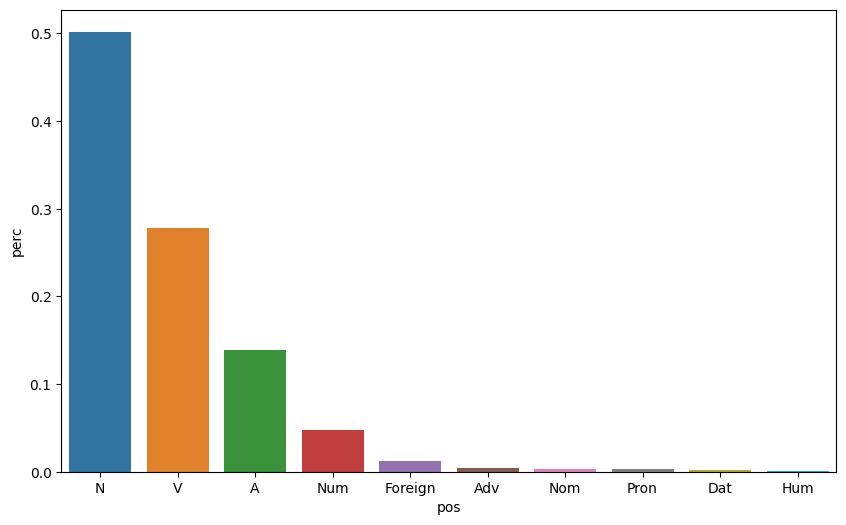

In [222]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_tag_by_lemma.query('perc > 0.001'), x='pos', y='perc')

მათ შორის როგორც ვხედავთ ყველაზე ხშირად არსებითი სახელები, ზმნები და ზედსართავი სახელების ტიპის სიტყვები გვხვდება კორპუსში.

In [311]:
cumulative_freq = pos_tag_by_freq.copy()
cumulative_freq.pos_tag = cumulative_freq.pos_tag.apply(lambda x: x + ' + _' if x != 'N' else x)
cumulative_freq.freq = cumulative_freq.freq.cumsum()

<AxesSubplot:xlabel='freq', ylabel='pos_tag'>

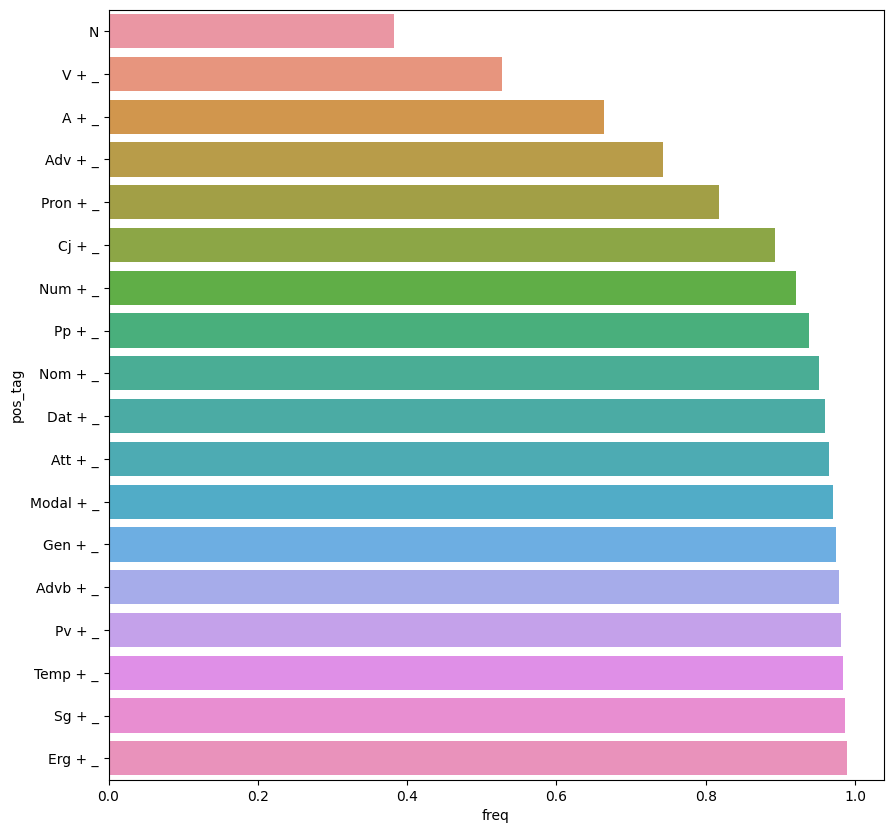

In [312]:
plt.figure(figsize=(10, 10))
sns.barplot(data=cumulative_freq.query('freq < 0.99'), y='pos_tag', x='freq', fill=True)

სიხშირეებს თუ დავაკვირდებით დავინახავთ, რომ 18 მეტყველების ნაწილის თეგი ასახავს ტექტში შეხვედრილი სიტყვების 99%

<AxesSubplot:xlabel='freq', ylabel='pos_tag'>

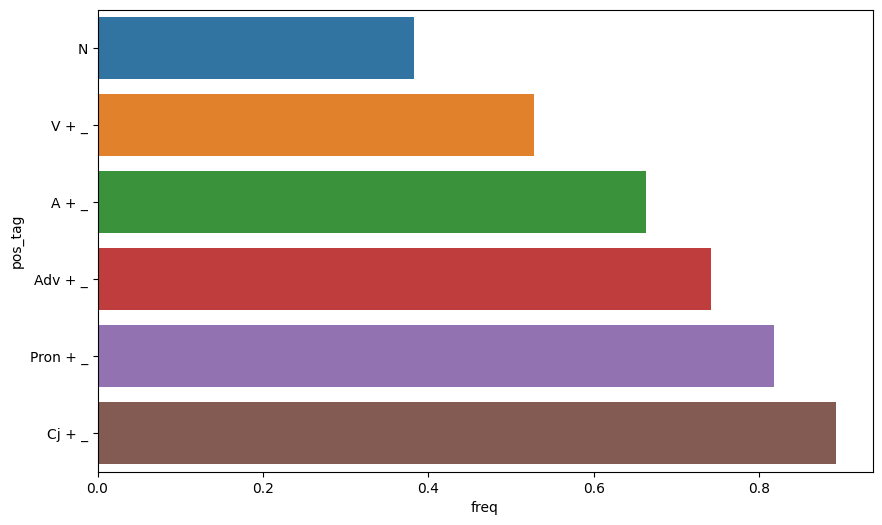

In [313]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cumulative_freq.query('freq < 0.90'), y='pos_tag', x='freq', fill=True)

<AxesSubplot:xlabel='pos_tag', ylabel='freq'>

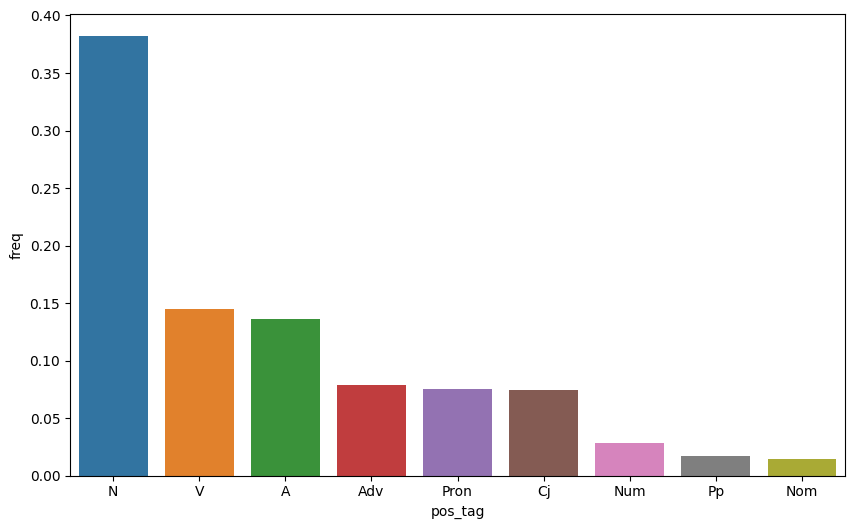

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_tag_by_freq.query('freq > 0.01'), x='pos_tag', y='freq')

<AxesSubplot:xlabel='perc', ylabel='pos'>

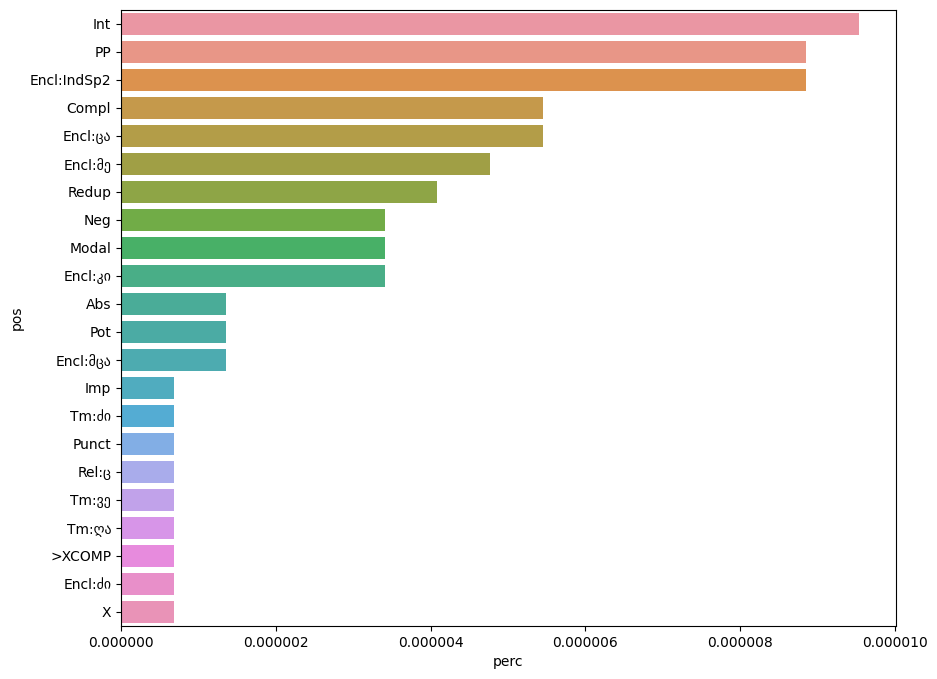

In [210]:
plt.figure(figsize=(10, 8))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(data=pos_tag_by_lemma.query('perc < 0.00001'), y='pos', x='perc')

<AxesSubplot:xlabel='pos_tag', ylabel='count'>

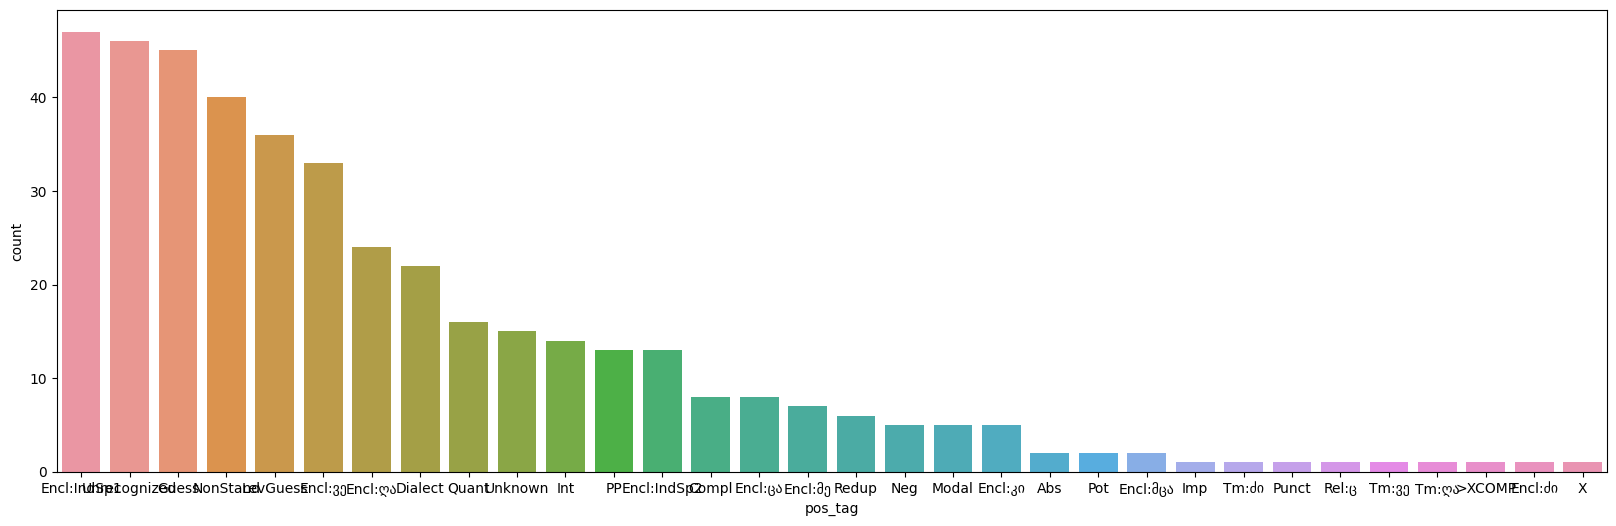

In [168]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df2,order=pd.value_counts(df2.pos_tag).loc[lambda x: x < 50].index, x='pos_tag')

Compl       8
Encl:ცა     8
Encl:მე     7
Redup       6
Neg         5
Modal       5
Encl:კი     5
Abs         2
Pot         2
Encl:მცა    2
Imp         1
Tm:ძი       1
Punct       1
Rel:ც       1
Tm:ვე       1
Tm:ღა       1
>XCOMP      1
Encl:ძი     1
X           1
Name: pos_tag, dtype: int64

In [64]:
lexem_group_sizes = df2.groupby('lemma').word.count()
lexem_group_sizes = lexem_group_sizes.reset_index()

In [65]:
lexem_group_sizes.columns = ['lemma', 'count']
freq_group = lexem_group_sizes.sort_values(by='count', ascending=False)[:10]

<AxesSubplot:xlabel='lemma', ylabel='count'>

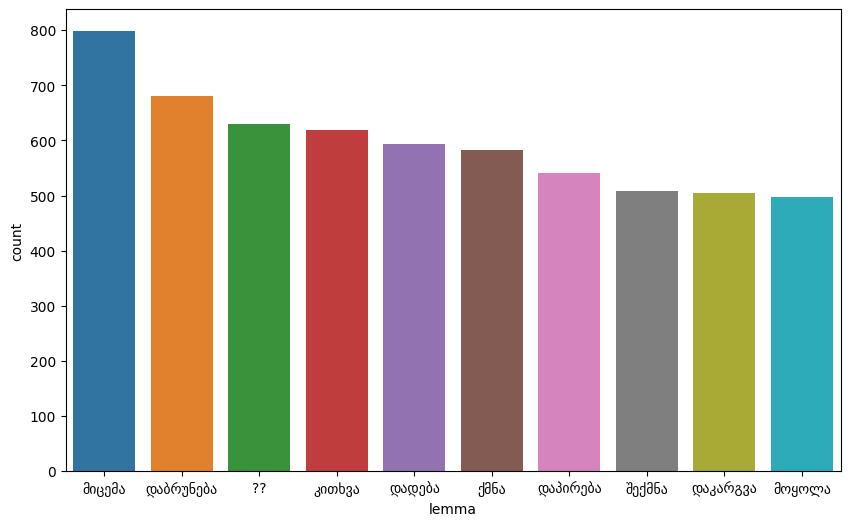

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_group, x='lemma', y='count')

In [321]:
len(df2.lemma.unique())

211260

In [95]:
def get_lexem_freq_by_pos(tag: str, num=10):
    common_lexem_group_sizes = (df2[df2['pos_tag'] == tag]
    .groupby('lemma')
    .word.count()
    .reset_index())
    common_lexem_group_sizes.columns = ['lemma', 'count']
    return common_lexem_group_sizes.sort_values(by='count', ascending=False)[:num]

In [97]:
get_lexem_freq_by_pos('N')

,lemma,count
2733,??,583
30160,კაცი,265
60028,ქვეყანა,261
61145,ღმერთი,258
68625,წელი,241
22124,დღე,228
3123,ადამიანი,218
51155,საქმე,213
51129,საქართველო,205
53422,სოფელი,199


<AxesSubplot:xlabel='lemma', ylabel='count'>

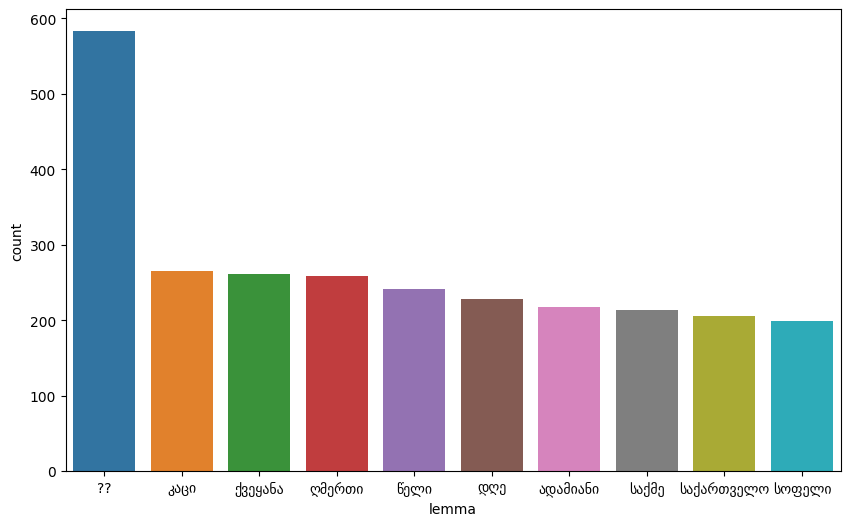

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('N'), x='lemma', y='count')

<AxesSubplot:xlabel='lemma', ylabel='count'>

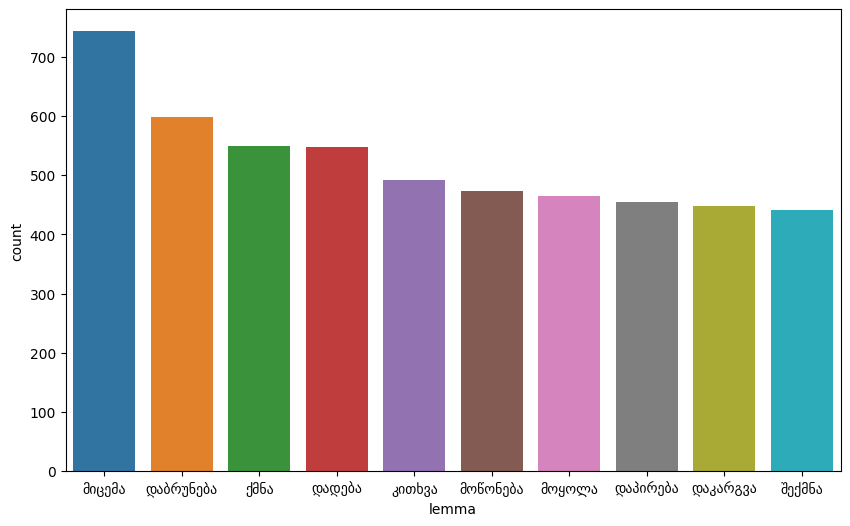

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('V'), x='lemma', y='count')

<AxesSubplot:xlabel='lemma', ylabel='count'>

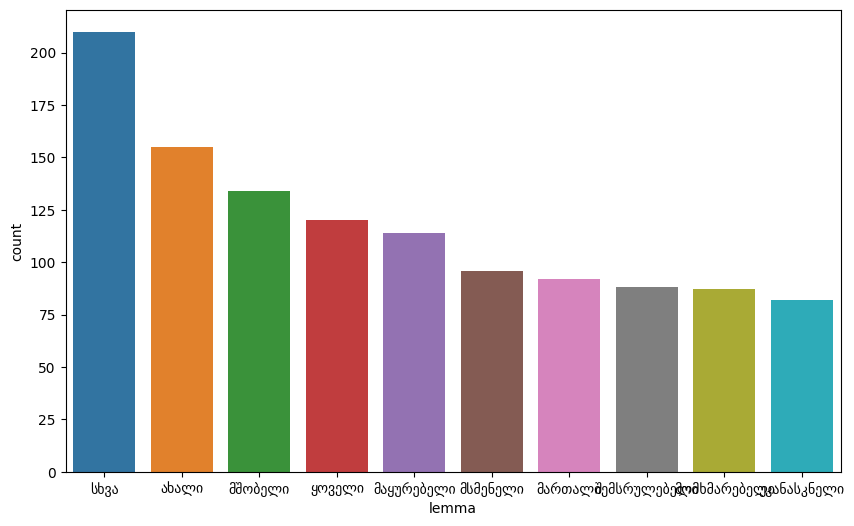

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('A'), x='lemma', y='count')

In [122]:
freq_lemma_df = df2.groupby('lemma').freq.sum().reset_index()
freq_lemma_df = freq_lemma_df.sort_values(by='freq', ascending=False)[:20]

<AxesSubplot:xlabel='lemma', ylabel='freq'>

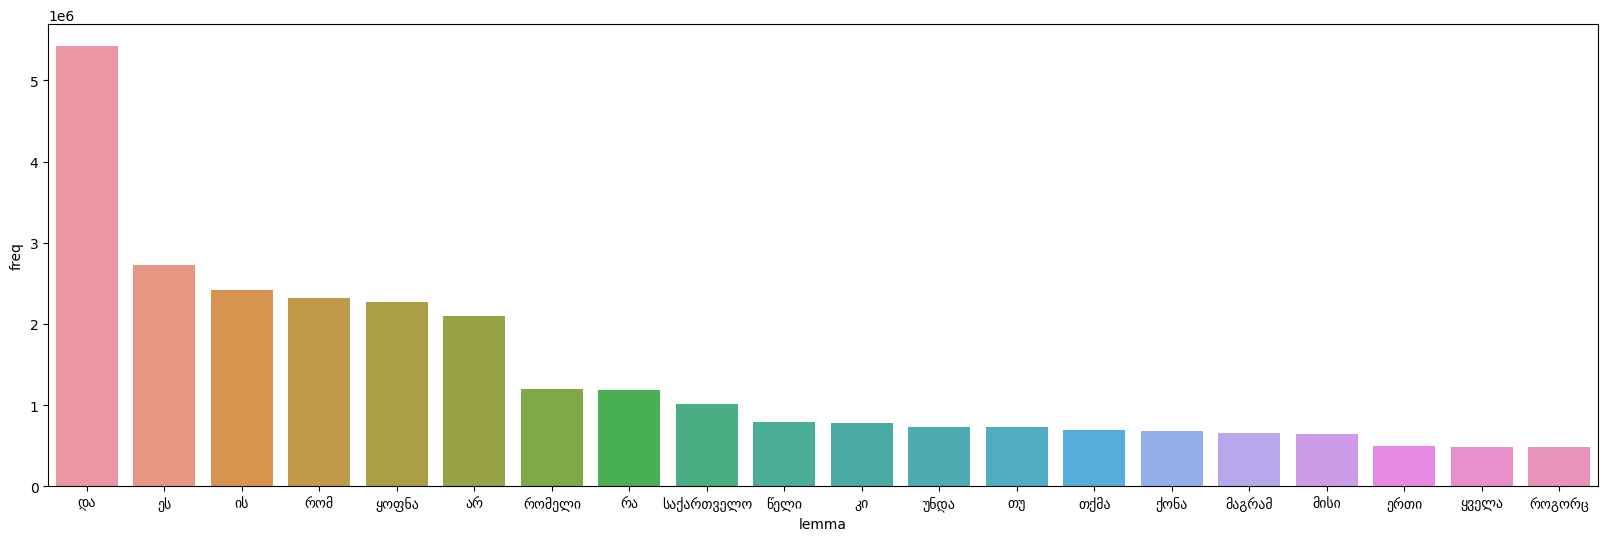

In [123]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df, x='lemma', y='freq')

In [134]:
freq_lemma_df = df2.groupby(['lemma', 'pos_tag']).freq.sum().reset_index()
freq_lemma_df = freq_lemma_df.sort_values(by='freq', ascending=False)

<AxesSubplot:xlabel='lemma', ylabel='freq'>

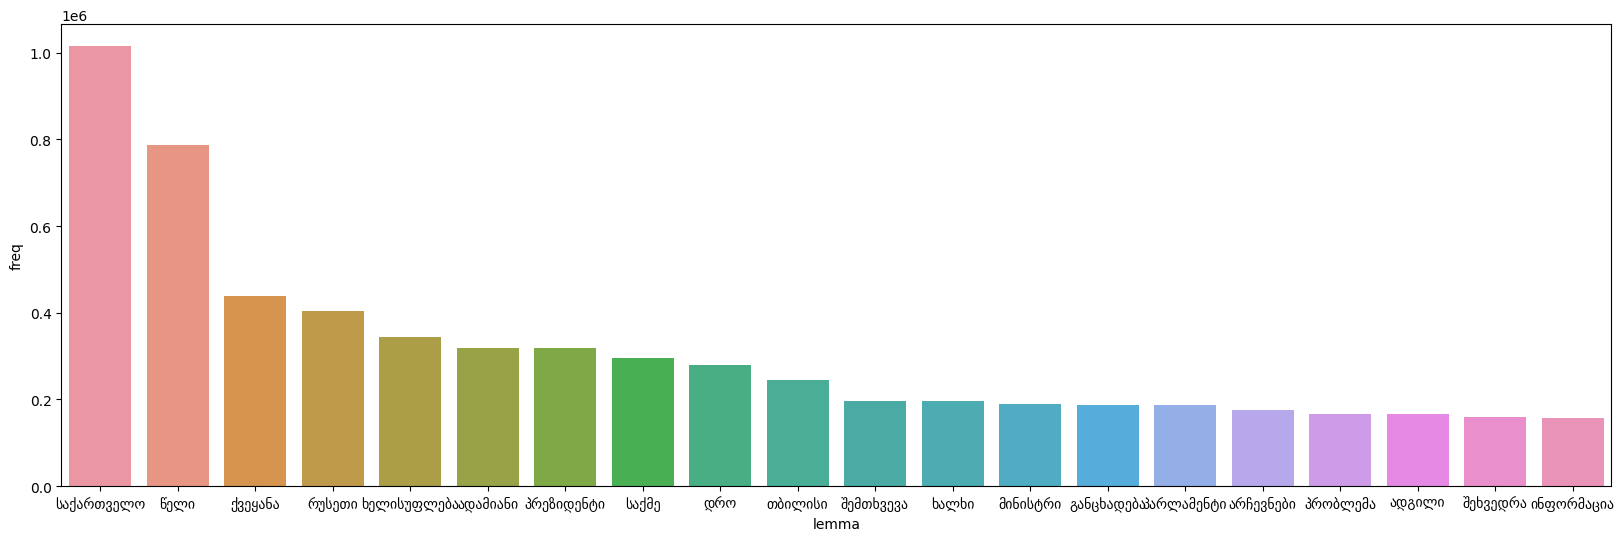

In [146]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'N'][:20], y='freq', x='lemma')

<AxesSubplot:xlabel='lemma', ylabel='freq'>

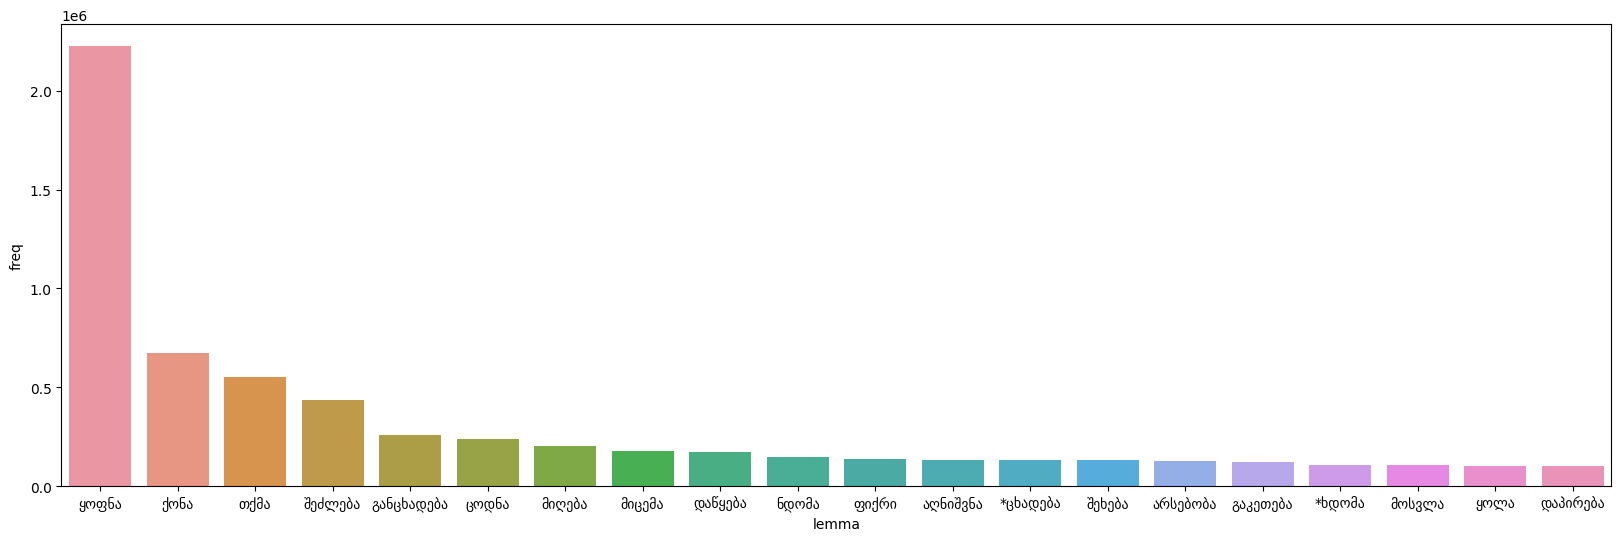

In [144]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'V'][:20], y='freq', x='lemma')

<AxesSubplot:xlabel='lemma', ylabel='freq'>

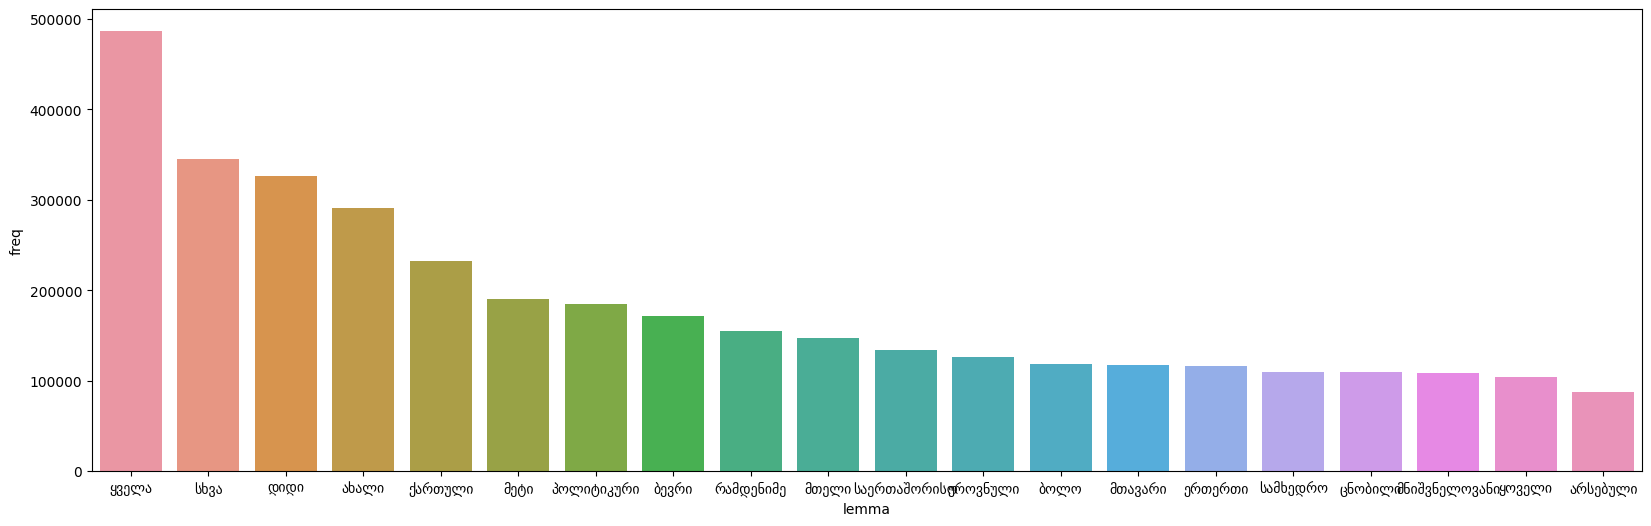

In [145]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'A'][:20], y='freq', x='lemma')

In [ ]:
df[df['lemma'] == '??']

In [69]:
df2[df2['lemma'] == '??']

,word,lemma,pos_tag,freq
3255,დ,??,N,4110
8168,ჟიულ,??,N,240
8813,ერნსტ,??,N,251
24701,შესანარჩუნებლად,??,Unrecognized,2421
25886,გამოისობით,??,Unrecognized,458
...,...,...,...,...
2453258,ბესო-კესო,??,N,3
2454637,ბასკაკები,??,N,3
2465985,გეკონტაქტებათ,??,N,3
2468870,ურთიერთთანაცხოვრების,??,Unrecognized,2


In [73]:
cleaned_df[cleaned_df['word'] == 'დ']

,word,lemma,freq,lemma_count
3200,დ,{'დ-ი'},4110,1


In [ ]:
comb = df.join(df2, lsuffix='_old', rsuffix='_new', on='word')